# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

In [20]:

# Answer to Part 3 : 

# 1. The cloud machine comprises of Nvidia tesla-k80 GPU. 

# 2.  It has 4992 CUDA cores and has a dual GPU design. 

# 3.  The graphics card has 24GB memory of type GDDR5.

# 4.  since it is not possible to fit all the data into GPU memory, batches of data are used. 
#     Portion of training data, weights of network, filter responses for each layer, gradients
#     of all parameters are usually stored in GPU. Depending on the size of the data set, either:
#     i. data can be fit into CPU memory and CPU will feed the GPU in batches. 
#     ii.If data does not fit in CPU memory,the data is streamed from HDD or network. 

# 5.  Intel Xenon CPU model E5-2690 is the CPU available in cloud machine.  it is a hexa core CPU. 

# 6.  53 GB RAM is available in the cloud machine. 


# Part 4: Load the data

Load the dataset from the prepared npy files


In [1]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')


# Remove the first 24 covariates
print(X.shape)
X=np.delete(X,np.s_[0:24],axis=1)


print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
print(X.shape)
print(Y.shape)

    

(764137, 116)
The covariates have size (764137, 92).
The labels have size (764137,).
(764137, 92)
(764137,)


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

In [5]:
# Answer 7: A naive classifier is simple, fast and highly precise. It can classify upto 95% accuracy and hence widely used.

In [2]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

#print(np.isnan(X))
# Print the number of NaNs (not a number) in the labels

print("the number of NaNs in the labels : ",np.sum(np.isnan(Y)))

# Print the number of NaNs in the covariates

print("the number of NaNs in the covariates : ",np.sum(np.isnan(X)))

the number of NaNs in the labels :  0
the number of NaNs in the covariates :  0


# Part 6: Preprocessing

Lets do some simple preprocessing

In [3]:
# Convert covariates to floats


X.astype(float)

# Convert labels to ints

Y.astype(int)

# Remove mean of each covariate (column)

mean_X=np.mean(X,axis=0)
#using numpy.newaxis or none 
X=X-mean_X  

# Divide each covariate (column) by its standard deviation
#using np.std numpy.newaxis or none 
X=X/np.std(X,axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("\nmean of all covariates : ",np.mean(X,axis=0))
print("\nStandard deviation of all covariates : ", np.std(X,axis=0))   




mean of all covariates :  [-3.19451533e-18 -6.32970181e-14  1.19926356e-13  4.56743018e-15
  4.10210037e-14  1.46130975e-13  5.85246484e-16 -1.69734859e-14
 -3.36915700e-13  1.28688437e-12 -2.69360995e-12 -1.10733213e-13
 -1.22392702e-13 -1.70649630e-13 -1.02461166e-14  2.50701280e-12
  1.47553162e-12  1.08446837e-12 -1.04981959e-13  6.83458762e-14
 -1.03373555e-13  5.98825773e-14 -1.02025960e-12 -1.68983055e-12
 -1.79101143e-12 -1.31828514e-13  4.42580403e-13  6.14635580e-13
  5.78048199e-14 -4.92623328e-13 -2.54513072e-12  1.86544900e-13
 -1.53444593e-13  1.68079591e-12  9.30041709e-13  1.50738177e-13
 -1.15688852e-12 -3.62610361e-13 -1.71390937e-12 -2.09264067e-13
  1.07161976e-12 -1.45236885e-12 -1.69724579e-14 -1.64918984e-16
 -5.13444996e-14 -1.02171349e-14 -1.74685907e-15  1.34264921e-13
  5.98801969e-14  1.48745574e-17 -4.25442340e-13  5.78079594e-14
  1.25638129e-15  1.69449684e-13  1.50725881e-13  2.14439542e-14
  3.65457183e-14  1.17260451e-13 -8.82752870e-13 -6.34816648e-1

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [4]:
# Your code
# create training and temp
from sklearn.model_selection import train_test_split
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y,shuffle=False, test_size=0.3)
print (Xtrain.shape, Ytrain.shape)
print (Xtemp.shape, Ytemp.shape)

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%
for i in range(2):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))
    print("Number of validation examples for class {} is {}" .format(i,np.sum(Ytemp == i)))


(534895, 92) (534895,)
(229242, 92) (229242,)
Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
Number of training examples for class 0 is 121621
Number of validation examples for class 0 is 0
Number of training examples for class 1 is 413274
Number of validation examples for class 1 is 229242


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?

Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [ ]:
# No, we can not use the data set as it is because one class of validation has zero data .It is therefore recommended to 
# randomly suffle to get both classes in training and testing (including validation).

In [5]:
from sklearn.utils import shuffle
from collections import Counter

# Randomly shuffle data, to get both classes in training and testing
Xtrain,Ytrain = shuffle(Xtrain,Ytrain,random_state=0)
Xtemp,Ytemp=shuffle(Xtemp,Ytemp,random_state=0)

# Divide the data into training and validation/test again
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3,random_state=0)

# Print the number of examples of each class, for the training data and the remaining 30%
print('Ytrain has size classes 1:{},0:{}.'.format(Counter(Ytrain)[1],Counter(Ytrain)[0]))
print('Ytemp has size classes 1:{},0:{}.'.format(Counter(Ytemp)[1],Counter(Ytemp)[0]))


Ytrain has size classes 1:449860,0:85035.
Ytemp has size classes 1:192656,0:36586.


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [6]:
from sklearn.model_selection import train_test_split
Xval,Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5,random_state=1)



print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [7]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.losses import binary_crossentropy as BC
from keras.layers import Dropout
from keras.optimizers import Adam


# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape,n_layers,n_nodes,act_fun='sigmoid',optimizer='sgd',learning_rate=0.01,use_bn=False,use_dropout=False,use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':

        opt = SGD(lr=learning_rate)

    elif optimizer == 'adam':

        opt = Adam(lr=learning_rate)

    else:

        raise ValueError('Optimizer should be sgd or adam')


    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    # Add first layer, requires input shape
    model.add(Dense(n_nodes,activation=act_fun,input_dim=input_shape)) 
    if use_bn==True:
        model.add(BatchNormalization())
    if use_dropout==True:
            model.add(Dropout(0.5))
    if use_custom_dropout==True:
            model.add(myDropout(rate=learning_rate,training=True))
    # Add remaining layers, do not require input shape
    
    for i in range(n_layers-1):
        model.add(Dense(n_nodes,activation=act_fun))
        if use_bn==True:
            model.add(BatchNormalization())
        if use_dropout==True:
            model.add(Dropout(0.5))
        if use_custom_dropout==True:
            model.add(myDropout(rate=learning_rate,training=True))
                       
    # Final layer
    model.add(Dense(1,activation='sigmoid')) # single node for final layer 

  
    # Compile model
    model.compile(loss=BC,optimizer=opt,metrics=['accuracy'])
    
    return model


Using TensorFlow backend.


In [8]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()


# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [9]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape =92 # batch_size,input_dim

# Build the model
model1= build_DNN(input_shape=92,n_layers=2,n_nodes=2,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval))

In [10]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest,Ytest,batch_size=10000)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.2032
Test accuracy: 0.9040


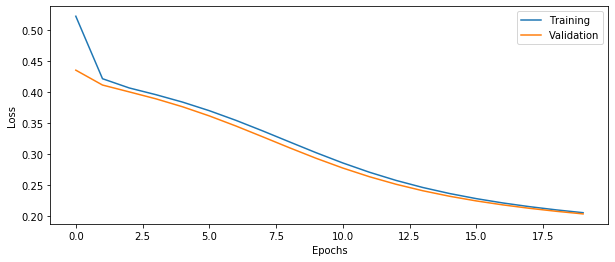

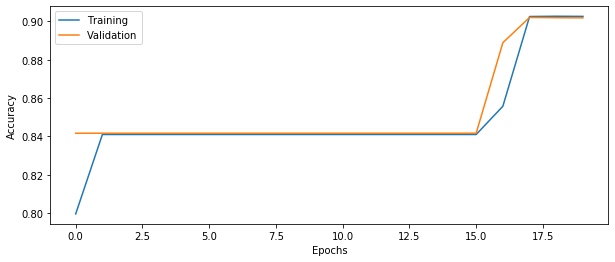

In [11]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

Question 9: What happens if you add several Dense layers without specifying the activation function?

Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?


In [ ]:
# Answer 9 : If there are no activation functions, feedforward will be like simple matrix multiplication. In such case  
# the output layer of the network performs regression, which should be naturally linear.

# Answer 10: Each layer has its own default value for initializing the weights.The default kernel initializer is 
#'glorot_uniform' and the default bias intializer is 'zeros'. These are added using Dense class function. For eexample
# tf.keras.layers.Dense( 
#    kernel_initializer="glorot_uniform",
#    bias_initializer="zeros",...)


# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [12]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights=class_weight.compute_class_weight('balanced', np.unique(Ytrain), Ytrain)

# Print the class weights
print(class_weights)


[3.14514612 0.59451274]


### 2 layers, 20 nodes, class weights

In [13]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =92

# Build and train model

model2= build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)


history2 = model2.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights)


In [14]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1721
Test accuracy: 0.9100


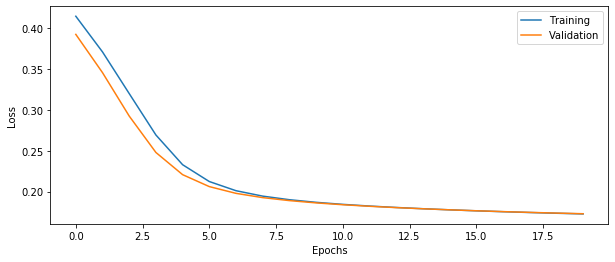

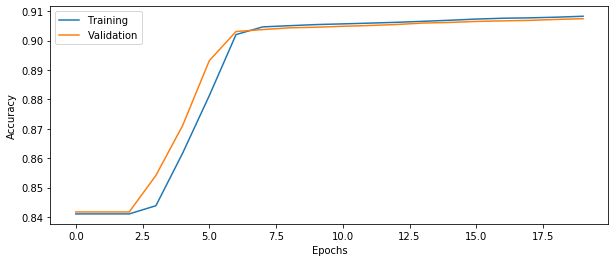

In [15]:
plot_results(history2)

# Part 14: More questions

Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Question 15: What limits how large the batch size can be?

Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

In [150]:

#  Answer 11. We can't use all data at once because as the size of the data increases it is not possible 
#     to fit into GPU memory. The limitation of CPU memory restricts the loading of all the data into 
#     CPU memory at once. Hence we use batchs of data instead of all the data. 
# Answer 12: We have used CPU instead of GPU for the lab.
# Answer 13: When Training examples is divided by the batch size, it gives no of iterations for one training epoch.
# Herein, we have Ytrain classes 1:449860,0:85035. So, total training data = 449860+ 85035=534895.
# When run on our CPU , we get :
# i. Processing time for one epoch when batch size is 100 = 11s 
# ii.Processing time for one epoch when batch size is 1000 = 3s 
# iii.Processing time for one epoch when batch size is 10000 =2s 

# Answer 14 : The number of times the weigths in the DNN uddated in each training epoch are as below :
#i. Batch size (100) = 5348 iterations times 
# ii. Batch size (1000) = 535 iterations times 
#iii. Batch size (10,000) = 53 iterations times 

# wherein training data size =534895.

# Answer 15 : Memory limits the batch size since larger the batch size the more memory space is required.

# Answer 16: The rule-of-thumb is that when batch size is incresed, learning rate should also be incresed by same factor.This
# is majorly applicable to mini-batch size.However, if the large batch size is decreased , the learning rate or 
# number of epochs has to be incresed  to get the same accuracy level.

# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

In [53]:
#Answer 17 : 
# i. For 2 layers and 20 nodes:
#    Trainable params: 2,301
model2.summary()
# ii. For 4 layers and 50 nodes :
#    Trainable params: 12,351
# model5.summary() # model 5 is in below cells



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                1860      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


### 4 layers, 20 nodes, class weights

In [17]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =92

# Build and train model
model3 = build_DNN(input_shape=92,n_layers=4,n_nodes=20,act_fun='sigmoid',optimizer='sgd',
                   learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)


history3 = model3.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights)

In [18]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.4349
Test accuracy: 0.8391


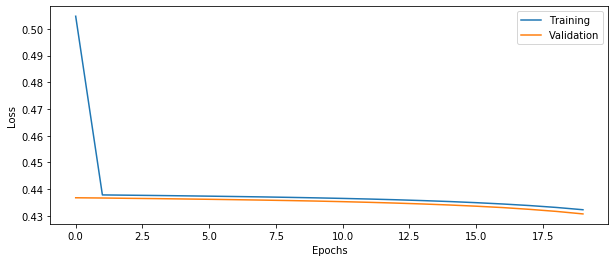

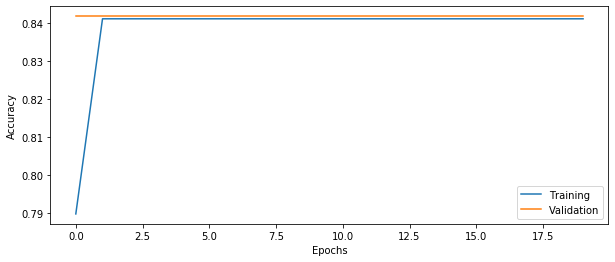

In [19]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [20]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =92

# Build and train model
model4 = build_DNN(input_shape=92,n_layers=2,n_nodes=50,act_fun='sigmoid',optimizer='sgd',
                   learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)

history4 = model4.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 

In [21]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1713
Test accuracy: 0.9095


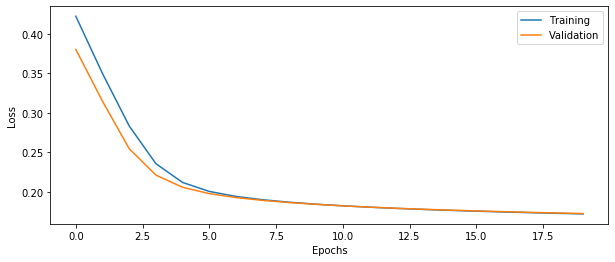

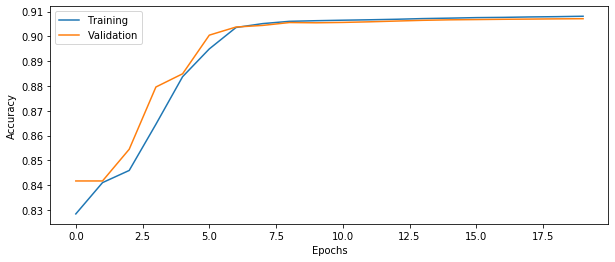

In [22]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [23]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =92

# Build and train model

# Build and train model
model5 = build_DNN(input_shape=92,n_layers=4,n_nodes=50,act_fun='sigmoid',optimizer='sgd',
                   learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)

history5 = model5.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,
                      validation_data=(Xval,Yval),class_weight=class_weights) 



In [24]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.4232
Test accuracy: 0.8391


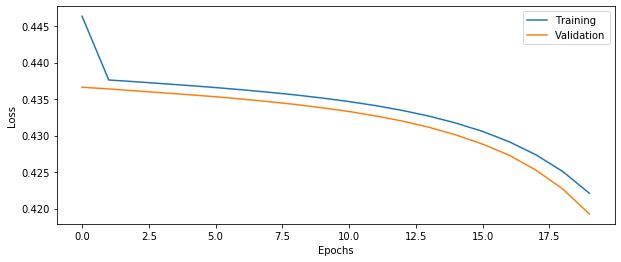

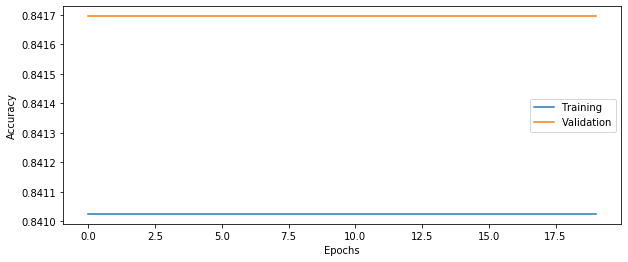

In [25]:
plot_results(history5)

In [54]:
# Answer 17
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                4650      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 18: Why is batch normalization important when training deep networks?

In [ ]:
# Answer 18. Batch normalization is used to standardize the inputs to a layer for each mini-batch. 
# It has therefore,  has the effect of stabilizing the learning process and helps in reducing the number of 
# training epochs required to train the networks.

### 2 layers, 20 nodes, class weights, batch normalization

In [26]:
from keras.layers.normalization import BatchNormalization
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = 92

# Build and train model
model6 =build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=True,use_dropout=False,use_custom_dropout=False)

history6 =model6.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 

In [27]:
# Evaluate model on test data
score =  model6.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1480
Test accuracy: 0.9196


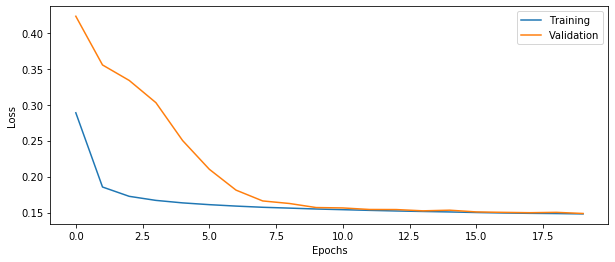

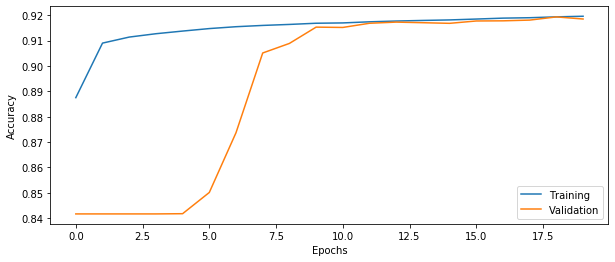

In [28]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [35]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = 92

# Build and train model
model7 =build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='relu',optimizer='sgd',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)


history7 = model7.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 

In [36]:
# Evaluate model on test data
score =  model7.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1510
Test accuracy: 0.9187


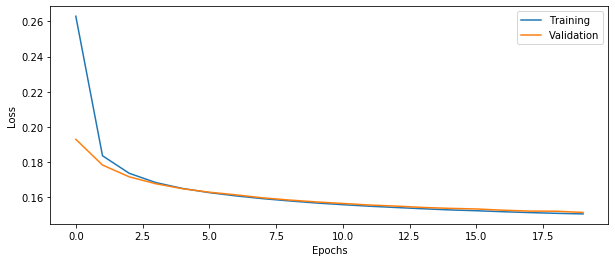

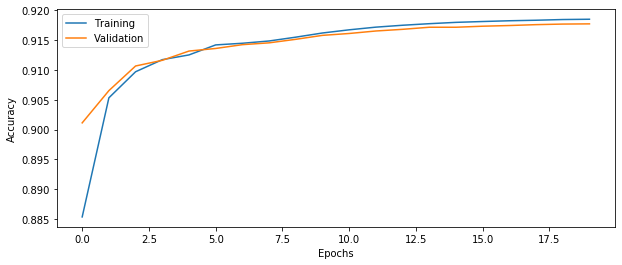

In [37]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [38]:
from keras.optimizers import Adam
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = 92

# Build and train model
model8 = build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='adam',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=False)

history8 = model8.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 

In [39]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1196
Test accuracy: 0.9344


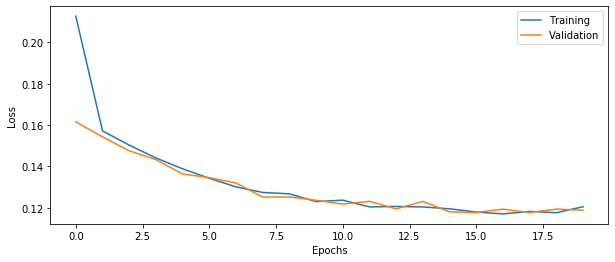

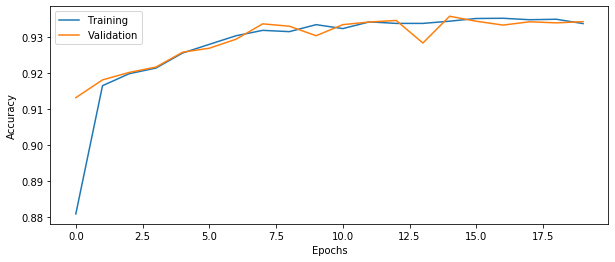

In [40]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

Question 19: How does the validation accuracy change when adding dropout?

Question 20: How does the test accuracy change when adding dropout?

In [ ]:
# Answer 19 :  Using drop-out , the validation accuracy is incresed marginally.
# Answer 20 : Using drop-out , the test accuracy is incresed marginally.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [41]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = 92

# Build and train model
model9 =build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=False,use_dropout=True,use_custom_dropout=False)


history9 = model9.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 

In [42]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1892
Test accuracy: 0.9040


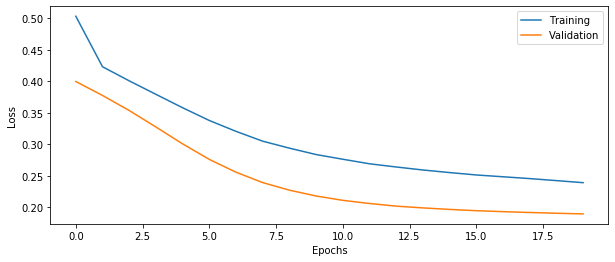

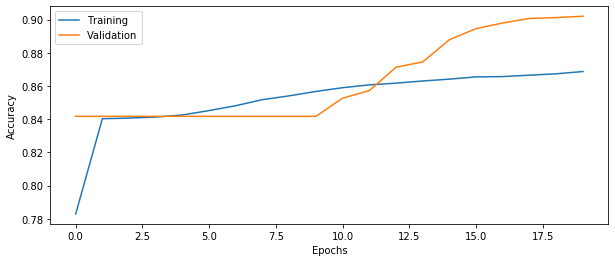

In [43]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [ ]:
# Answer 21 : highlighted and Calculated below 

In [44]:
# Find your best configuration for the DNN

# Build and train DNN
model10 =   build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='adam',learning_rate=0.1,use_bn=False,use_dropout=True,use_custom_dropout=False)

history10 = model10.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 


In [45]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1489
Test accuracy: 0.9202


# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 22: What is the mean and the standard deviation of the test accuracy?

In [46]:
import keras
import keras.backend as K

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [47]:
# Your best training parameters


# Build and train model
model11 =build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',optimizer='adam',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=True)

history11 = model11.fit(Xtrain,Ytrain,batch_size=10000,epochs=20,verbose=0,validation_data=(Xval,Yval),class_weight=class_weights) 


In [48]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest,batch_size=10000)
                       
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test accuracy: 0.9279


In [49]:
print(score[1])

0.9278753399848938


In [50]:
# Run the testing 100 times, and save the accuracies in an array

total_accuracy=[]
for i in range(1,101):
    score= model11.evaluate(Xtest,Ytest,batch_size=10000)
    total_accuracy.append(score[1])
#print(total_accuracy)
# Calculate and print mean and std of accuracies

mean_total_accuracy=np.mean(total_accuracy,axis=0)
print("mean of test accuracies : ",mean_total_accuracy)
sd_total_accuracy=np.std(total_accuracy,axis=0)
print("std of test accuracies : ",sd_total_accuracy)


114621/114621 [==============================] - 0s 2us/step
mean of test accuracies :  0.9280904000997543
std of test accuracies :  0.00031813730482284304


# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 23: What is the mean and the standard deviation of the test accuracy?

Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?

In [ ]:
# Answer 23 : Calculated below 
#Answer 24.  The main advantage of dropout compared to CV is that the dropout prevents overfitting of the model 
# and works with higher speed.

In [51]:
from sklearn.model_selection import StratifiedKFold

# Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y,shuffle=False, test_size=0.3)
# print (Xtrain.shape, Ytrain.shape)
# print (Xtemp.shape, Ytemp.shape)

# Define 10-fold cross validation
skf = StratifiedKFold(n_splits=10,random_state=1234, shuffle=True)
skf.get_n_splits(X, Y)
print(skf)

# Loop over cross validation folds
accuracy_CV=[]
for train_index, test_index in skf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Calculate class weights for current split
    class_weights=class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    model_CV =build_DNN(input_shape=92,n_layers=2,n_nodes=20,act_fun='sigmoid',
                        optimizer='adam',learning_rate=0.1,use_bn=False,use_dropout=False,use_custom_dropout=True)
    
    # Fit the model with training set and class weights for this fold
    history_CV = model_CV.fit(X_train,Y_train,batch_size=10000,epochs=20,verbose=0,
                            class_weight=class_weights)
     # Evaluate the model using the test set for this fold
    score_CV = model_CV.evaluate(X_test,Y_test,batch_size=10000)[1]
    
    # Save the test accuracy in an array
    accuracy_CV.append(score_CV)

# Calculate and print mean and std of accuracies
mean_total_accuracy=np.mean(accuracy_CV,axis=0)
print("mean of accuracies : ",mean_total_accuracy)
sd_total_accuracy=np.std(accuracy_CV,axis=0)
print("std of accuracies : ",sd_total_accuracy)



StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)
76413/76413 [==============================] - 0s 2us/step
mean of accuracies :  0.9311118304729462
std of accuracies :  0.0013858760117300955


# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 25: How would you change the DNN in order to use it for regression instead?

In [ ]:
# A DNN cane be used for regression by not using any activation unit in the end , resulting in input parameter to flow-out.

## Report

Send in this jupyter notebook, with answers to all questions.